In [154]:
!pip install pandas


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('Data.csv')


In [157]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


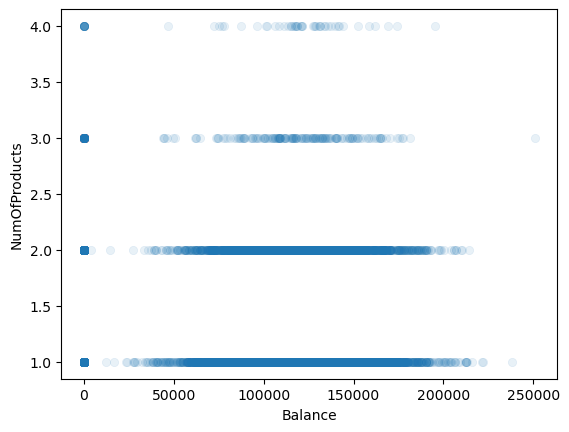

In [159]:
sns.scatterplot(x='Balance',y='NumOfProducts',data=df,alpha=0.1,edgecolor=None);

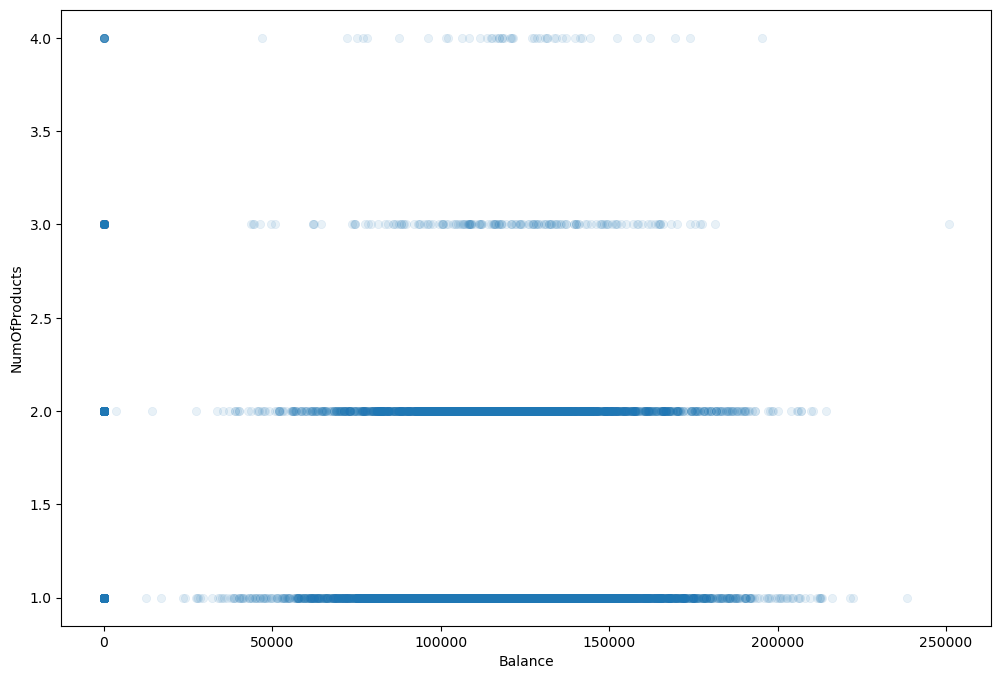

In [160]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Balance',y='NumOfProducts',data=df,alpha=0.1,edgecolor=None);

<Axes: xlabel='Balance', ylabel='NumOfProducts'>

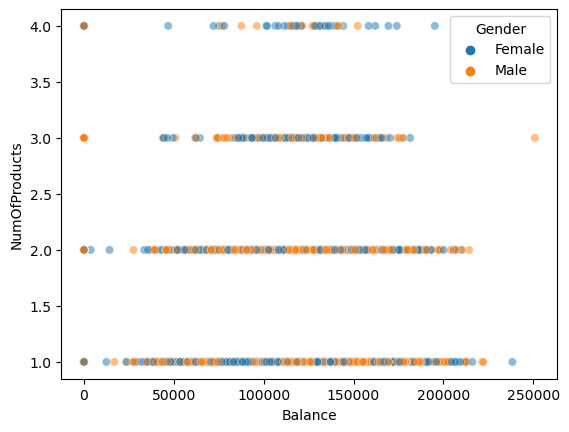

In [161]:
sns.scatterplot(x='Balance', y='NumOfProducts', hue='Gender', data=df, alpha=0.5)


<Axes: xlabel='Balance', ylabel='NumOfProducts'>

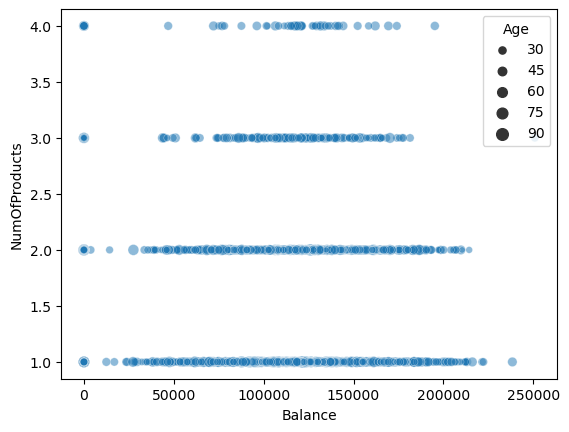

In [162]:
sns.scatterplot(x='Balance', y='NumOfProducts', size='Age', data=df, alpha=0.5)


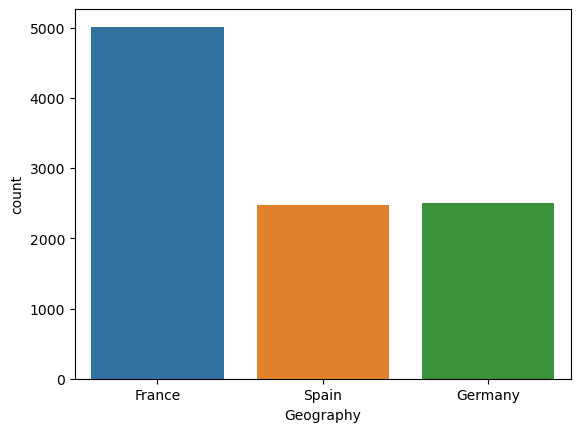

In [163]:
sns.countplot(x='Geography',data=df);


# Preparation des données :


## Je suis actuellement engagés dans une tâche de classification de données.

## Plus précisément, je dispose  d'un ensemble de données comprenant plusieurs variables.

## Mon objectif est de prédire si un client quittera ou non la banque dans les six prochains mois. 

## Cette tâche est essentielle pour anticiper les besoins de nos clients et prendre des mesures proactives pour les retenir.

## Grâce à l'analyse de ces variables et à l'utilisation de techniques de classification,j'espérons développer un modèle qui nous aidera à mieux comprendre les facteurs qui influencent les décisions de départ de nos clients. 

## Ce qui permettra d'élaborer des stratégies visant à améliorer la rétention des clients et à renforcer notre relation avec eux.

In [164]:
x = df.iloc[:, 3:13].values
print(x)
# Utilisez l'attribut 'dtype' pour obtenir le type de données du tableau NumPy
type_de_donnees = x.dtype

print(type_de_donnees)


[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
object


In [165]:
nombre_de_colonnes = df.shape[1]
print("Nombre de colonnes :", nombre_de_colonnes)


Nombre de colonnes : 14


In [166]:
nombre_de_colonnes = x.shape[1]
print("Nombre de colonnes :", nombre_de_colonnes)


Nombre de colonnes : 10


In [167]:
y = df.iloc[:, 13]
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


# Les variables categorique 

In [168]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
#L'encodage one-hot est utilisé lorsque on a des variables catégorielles sans relation ordonnée.
# Il convertit chaque catégorie en un vecteur binaire

LabelEncoder_x = LabelEncoder()

x[:, 1] = LabelEncoder_X.fit_transform(x[:, 1])

#créé une instance de LabelEncoder appelée LabelEncoder_x1 "Geography"
#appliqué l'encodeur LabelEncoder_x1 à la deuxième colonne (indexée à 1) du tableau x en utilisant la méthode fit_transform.
#modifier La colonne indexée à 1 de x pour contenir les valeurs numériques encodées à la place des valeurs originales.


#pareil pour la 3 colonne "Gender"
LabelEncoder_x2 = LabelEncoder()

x[:, 2] = LabelEncoder_X.fit_transform(x[:, 2])

In [169]:
# Affiche les 5 premières lignes du tableau x
print(x[:5])


[[619 0 0 42 2 0.0 1 1 1 101348.88]
 [608 2 0 41 1 83807.86 1 0 1 112542.58]
 [502 0 0 42 8 159660.8 3 1 0 113931.57]
 [699 0 0 39 1 0.0 2 0 0 93826.63]
 [850 2 0 43 2 125510.82 1 1 1 79084.1]]


In [170]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = [1]

# Créez un transformateur de colonnes
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Cela inclut les colonnes non spécifiées dans 'categorical_columns'
)

# Appliquez la transformation aux données 'x'
x = column_transformer.fit_transform(x)


#cette opération est que les colonnes catégorielles spécifiées sont converties en représentations one-hot,
#ce qui signifie que chaque valeur catégorielle devient une colonne binaire avec des 0 et des 1 pour indiquer
#la présence ou l'absence de chaque catégorie


In [171]:
# Affiche les 5 premières lignes du tableau x
print(x[:5])

[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]


In [172]:
# Utilisez l'attribut 'dtype' pour obtenir le type de données du tableau NumPy
type_de_donnees = x.dtype

print(type_de_donnees)

nombre_de_colonnes = x.shape[1]

print("Le nombre de colonnes dans 'x' est :", nombre_de_colonnes)


object
Le nombre de colonnes dans 'x' est : 12


In [173]:
x = x[:, 1:]

In [174]:
import numpy as np

# Vérifiez que x est un tableau NumPy
if isinstance(x, np.ndarray):
    # Vérifiez si x est multidimensionnel
    if len(x.shape) > 1:
        nombre_de_colonnes = x.shape[1]
        print("Le nombre de colonnes dans 'x' est :", nombre_de_colonnes)
    else:
        print("x n'est pas un tableau multidimensionnel.")
else:
    print("x n'est pas un tableau NumPy valide.")


Le nombre de colonnes dans 'x' est : 11


# Separation des jeux des données en Training et de test 

In [175]:
#split dataset en : training et set de test
from sklearn.model_selection import train_test_split

# Utilisez maintenant train_test_split pour diviser votre ensemble de données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [182]:
taille_X_train = X_train.shape

# Affiche la taille de X_train
print(taille_X_train)


(8000, 11)


In [185]:
taille_X_test = X_test.shape

# Affiche la taille de X_train
print(taille_X_test)


(2000, 11)


# Mise a jour de lechelle des variables "Normalisation"

In [186]:
from sklearn.preprocessing import StandardScaler

# Créez une instance de StandardScaler
sc = StandardScaler()

# Ajustez et transformez les données d'entraînement
X_train = sc.fit_transform(X_train)

# Transformez les données de test en utilisant les mêmes paramètres de normalisation
X_test = sc.transform(X_test)



# Construire le Reseau de neurones

In [187]:
!pip install tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialisation

In [188]:
classifier = Sequential()

In [189]:
# ajout des couche : initial et 1 couche caché

classifier.add(Dense (units=6,activation = "relu",kernel_initializer="uniform",input_dim=11))

# j'ai ajouté une couche Dense (entièrement connectée) avec 6 unités (neurones),
# une fonction d'activation ReLU,
# une initialisation de poids uniforme 
# une dimension d'entrée de 11 (c'est-à-dire que votre modèle attend des données d'entrée avec 11 caractéristiques).


In [190]:
# ajouter une deusieme couche 
#pareil juste il faut supprimer le input_dim sur cette couche

classifier.add(Dense (units=6,activation = "relu",kernel_initializer="uniform"))

On a maintenat nos trois coucher de reseaux de neurone :

* une couche d'entré avec 11 variable ou 11 entré /neuronne 

* une Premier coucher avec 6 entré/neurone 

* une deuxieme couche aussi avec 6

In [191]:
# Ajout de la couche de sortie 
# pareil comme les autres couche avec changement des parametres 
# la fonction sigmoïde est la fonction d'activation pour la couche de sortie du réseau de neurones
# pour la classification binaire. Elle transforme la sortie de la dernière couche du réseau en une probabilité
# dans l'intervalle [0, 1], permettant ainsi de prendre une décision sur la classe d'appartenance.
# me permet de predire le pourcentage qun client quittera la banque ou non d(ans les 6 prochain mois )

classifier.add(Dense (units=1,activation = "sigmoid",kernel_initializer="uniform"))

In [192]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# Entrainer le reseaux 

In [204]:
classifier.fit(X_train,y_train ,batch_size=4 ,epochs=100)

Epoch 1/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4049 - accuracy: 0.8341
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4029 - accuracy: 0.8361
Epoch 3/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4021 - accuracy: 0.8359
Epoch 4/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4030 - accuracy: 0.8366
Epoch 5/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4023 - accuracy: 0.8344
Epoch 6/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4022 - accuracy: 0.8378
Epoch 7/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4029 - accuracy: 0.8347
Epoch 8/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4019 - accuracy: 0.8360
Epoch 9/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4027 - accuracy: 0.8349
Epoch 10/100
2000/2000 [==============================] - 6s 3ms/step - l

2000/2000 [==============================] - 13s 6ms/step - loss: 0.3991 - accuracy: 0.8361
Epoch 80/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3993 - accuracy: 0.8366
Epoch 81/100
2000/2000 [==============================] - 11s 5ms/step - loss: 0.3996 - accuracy: 0.8366
Epoch 82/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.3990 - accuracy: 0.8374
Epoch 83/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3989 - accuracy: 0.8390
Epoch 84/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3994 - accuracy: 0.8378
Epoch 85/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3992 - accuracy: 0.8367
Epoch 86/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.3989 - accuracy: 0.8395
Epoch 87/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.3991 - accuracy: 0.8379
Epoch 88/100
2000/2000 [==============================] - 10s 5ms/st

# Prediction des données de test 

In [205]:
y_pred =classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [206]:
print(y_pred)

[[0.05531289]
 [0.10842133]
 [0.3559469 ]
 ...
 [0.4880336 ]
 [0.02667634]
 [0.1851243 ]]


In [207]:
#on prend le seuil de 50% pour dire si le client va quitter ou pas 
# sile prob est superieur à 50 ===> quitter = false 
y_pred = (y_pred >0.5)

In [208]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [209]:
from sklearn.metrics import confusion_matrix

In [210]:
cm = confusion_matrix(y_test,y_pred)

In [211]:
print (cm)

[[1567   40]
 [ 273  120]]


* Les éléments diagonaux représentent les valeurs correctement prédites, 
    * c'est-à-dire les vrais positifs (TP) et les vrais négatifs (TN). 
    
    
* Les éléments en dehors de la diagonale représentent les erreurs de classification :
    * Les faux positifs (FP) se trouvent dans la première colonne en dehors de la diagonale.
    * Les faux négatifs (FN) se trouvent dans la deuxième colonne en dehors de la diagonale.
    
   ## on a ici 1567+40 qui sont correct
   ## et 273 +120 :incorrect
   
  
 

In [212]:
(1544+128)/2000

0.836

# Mise en place et predictio

Utilisez le réseau de neurones pour prédire si le client suivant va ou non quitter la banque dans les 6 mois :

Pays : France 

Score de crédit : 600 

Genre : Masculin 

Âge : 40 ans 

Durée depuis entrée dans la banque : 3 ans

Balance : 60000 € 

Nombre de produits : 2 

Carte de crédit ? Oui 

Membre actif ? : Oui 

Salaire estimé : 50000 € 

Devrait-on dire au revoir à ce client ? 




In [214]:
new_prediction = classifier.predict(sc.transform (np.array([[0.0,0,600,0,40,3,60000,2,1,1,50000]])))
new_prediction = (new_prediction>0.5)                                  

1/1 [==============================] - 0s 58ms/step


In [215]:
print(new_prediction)

[[False]]
